# Plotting for Exploratory Data Analysis(EDA) for Cancer Patients

# Habermans Dataset


 Sources: (a) Donor: Tjen-Sien Lim (b) Date: March 1999

Past Usage:

Haberman, S. J. (1976). Generalized Residuals for Log-Linear Models, Proceedings of the 9th International Biometrics Conference, Boston, pp. 104-122. Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984), Graphical Models for Assessing Logistic Regression Models (with discussion), Journal of the American Statistical Association 79: 61-83. Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis, Department of Statistics, University of Wisconsin, Madison, WI. Relevant Information: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

       Number of Instances: 306
       Number of Attributes: 4 (including the class attribute)
       Attribute Information:
               Age of patient at time of operation (numerical)
               Patients year of operation (year - 1900, numerical)
               Number of positive axillary nodes detected (numerical)
               Survival status(class attribute) 1 = the patient survived 5 years or longer 
                                                2 = the patient died within 5 year
       Missing Attribute Values: None


# Objective:-

Classify a new patient according to data whether he belongs to the class in which patients who have survived for 5 years or more or he belongs to the class in which patients who have survived lessthan 5 years.


In [6]:
#importing all libraries 
import pandas as pd
import seaborn  as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Importing Data from CSV file using Pandas Read CSV Function

In [7]:
# downlaod haberman.csv from
# https://www.kaggle.com/gilsousa/habermans-survival-data-set

#Load haberman.csv into a pandas dataFrame.
haberman = pd.read_csv("haberman.csv")

In [8]:
#  how many data-points and columns?
print(haberman.shape)

(306, 4)


In [9]:
# What are the column names in our dataset?
print (haberman.columns)
haberman.head()

Index(['age', 'year', 'nodes', 'status'], dtype='object')


,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Observation:

      -> Here 1st column age represents age of the patient.
    
      -> Here 2nd column year represents in which year his operation has done.
    
      -> Here 3rd column nodes represents number of positive_lymph_nodes(the nodes which are responsible for cancer) ie no of                               tumors found.
    
      -> Here 4th column status represents survival status of the person after operation.
            1 - shows about the person survived 5 years or longer
            2 - shows about the person died in lessthan 5 years.

In [10]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


Observation:

    1. 306 rows and 4 columns
    2. Columns are Age, year,nodes,status
    3. all elements are non-null and int values

In [11]:
# how many patients survived over 5 years and more and how many died within 5years?
haberman["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

Observation: 

    -> Here status 1 represents people who  lived for 5 years or morethan 5 years.
    
    -> Here status 2 represents people who lived for lessthan 5 years.
    
    -> Out of 306.
            225 people lived more than 5 years and
            81 people died less than 5 years.

In [12]:
haberman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


Observation:

1. The Age of the patients ranges from 30 to 83 with the median of 52.
2. Although the maximum number of positive lymph nodes observed is 52, nearly 75% of the patients have less than 5 positive lymph nodes and nearly 25% of the patients have no positive lymph nodes

# BI-VARIATE ANALYSIS

# 2-D Scatter Plot

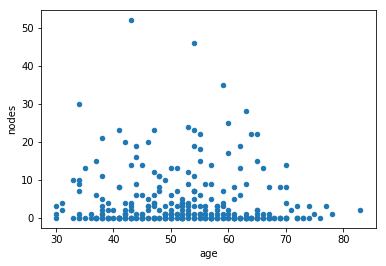

In [13]:
# lets plot plain scatter plot considering age and axillary nodes
haberman.plot(kind='scatter', x='age', y='nodes');
plt.show()

Observation: positive lymph nodes of the most of the people are zero.

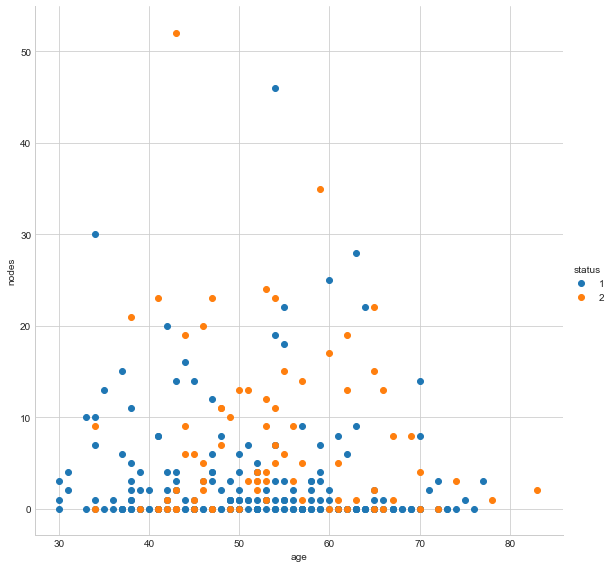

In [14]:
# 2-D Scatter plot with color-coding for each survival status type/class.
# Here 'sns' corresponds to seaborn.
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=8) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.show();

Observations:

   -> most of the patients have 0 positive lypmh nodes detected.
   
   -> Nearly 70% of nodes are in between 0 to 10.
   
   -> Here we clearly see that blue points are not seperated from orange points.
   
   -> So, by looking this 2-D scatter plot between 'Age' and 'nodes' we cannot make any decision regarding patient's survival.
   
   -> Therefore, we have to check all combination/pair of features to make good classification/decision.
   
   -> Number of Combinations of features : 3C2 = 3 (excluding class-attribute 'Survival')
   
   -> Now, for these combination to analyse,Pair-Plot concept is used.


# Pair-plot

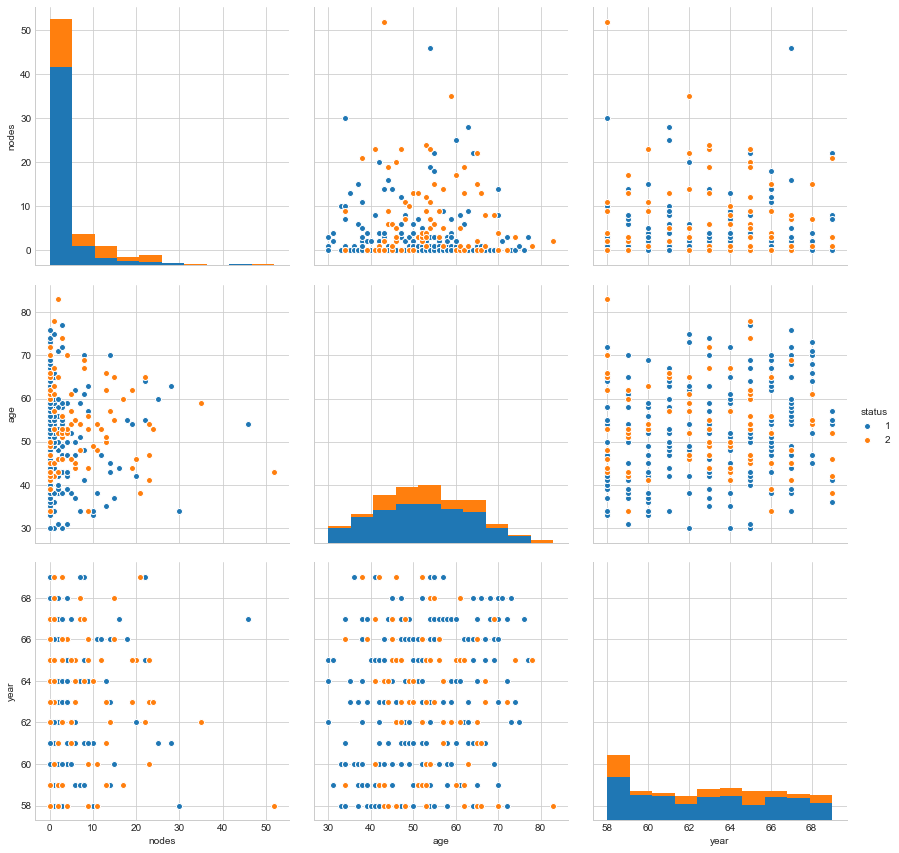

In [28]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman,vars=["nodes","age","year"],hue="status",size=4)
plt.show()

Observations:-
    
  -> nodes is a useful feature to identify the survival_status of cancer patients
  
  -> Age and Year of operation have overlapping curves so we can't have a suitable observation that can classify status

# UNIVARIATE ANALYSIS

# Histogram, PDF

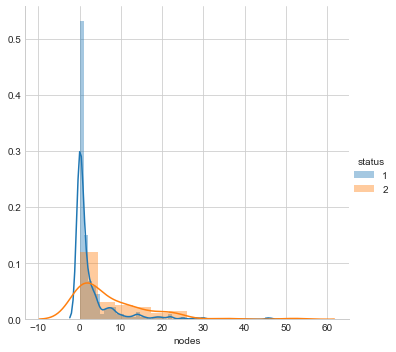

In [16]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();


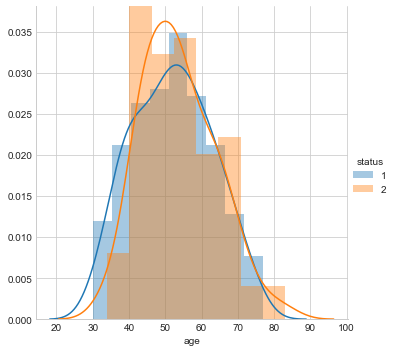

In [17]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

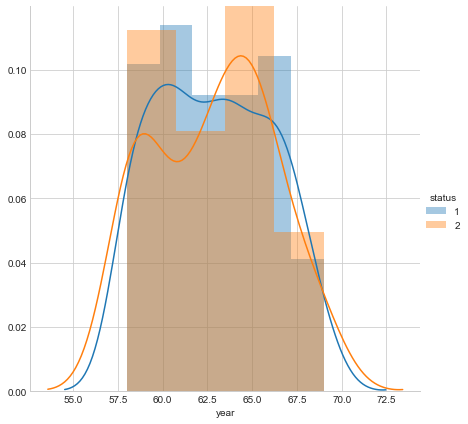

In [18]:
sns.FacetGrid(haberman, hue="status", size=6) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

Observation:

-> From the above PDFs(Univariate analysis) both Age and Operation_Year are not good features for useful insights as the distibution is more similar for both people who survived and also dead.

-> positive_lymph_nodes is the only feature that is useful to know about the survival status of patients as there is difference between the distributions for both classes(labels). From that distibution we can infer that most survival patients have fallen in to zero positive_lymph_nodes.

-> From the year distribution, we can observe that people who didnt survive suddenly rise and fall in between 1958 and 1960. More number of people are not survived in year of operation of 1965

# CDF

In [19]:
#divide the data set in two according to the label Survival status 
# alive means status=1 and dead means status =2
alive=haberman.loc[haberman["status"]==1]
dead=haberman.loc[haberman["status"]==2]

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


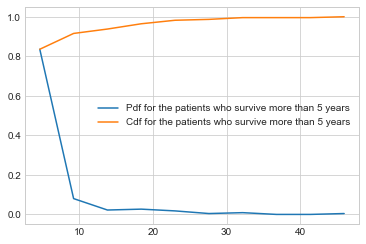

In [27]:
counts, bin_edges = np.histogram(alive['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf for the patients who survive more than 5 years',
            'Cdf for the patients who survive more than 5 years'])
plt.show()

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


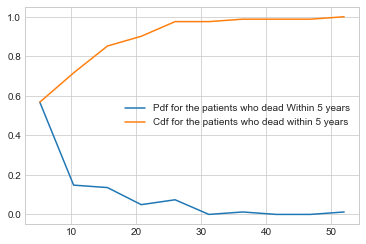

In [28]:
counts, bin_edges = np.histogram(dead['nodes'], bins=10, density=True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf for the patients who dead Within 5 years',
            'Cdf for the patients who dead within 5 years'])
plt.show()

In [ ]:
# performing summary statistics below to get an idea to distinguish between the survival and not survival.

# Mean, Variance and Std-dev

In [35]:
print("Summary Statistics of Patients who are alive for more than 5 years:")
alive.describe()

Summary Statistics of Patients who are alive for more than 5 years:


,age,year,nodes,status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [36]:
print("Summary Statistics of Patients who are dead within 5 years:")
dead.describe()

Summary Statistics of Patients who are dead within 5 years:


,age,year,nodes,status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


Observations:

-> From both the tables we can observe that almost for all the features the statistics are similar except for positive_lymph_nodes.

-> The mean(average) of positive_lymph_nodes is more for people who died within 5 years than people who have survived for more than 5 years

-> From the observation of CDFs, we can infer that patients above 46 axillary nodes detected can be considered as dead within 5 years. So,People having less number of positive_lymph_node have survived

# Median, Percentile, Quantile, IQR, MAD

In [30]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(alive["nodes"]))
#Median with an outlier
print(np.median(np.append(alive["nodes"],50)));
print(np.median(dead["nodes"]))

print("\nQuantiles:")
print(np.percentile(alive["nodes"],np.arange(0, 100, 25)))
print(np.percentile(dead["nodes"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(alive["nodes"],90))
print(np.percentile(dead["nodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(alive["nodes"]))
print(robust.mad(dead["nodes"]))


Medians:
0.0
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


# Box plot and Whiskers

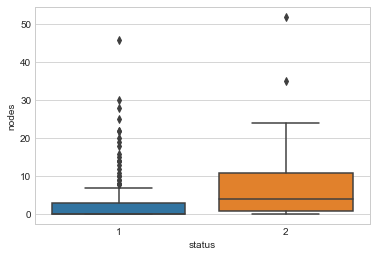

In [29]:
"""
Box plot takes a less space and visually represents the five number summary of the data points in a box. 
The outliers are displayed as points outside the box.
1. Q1 - 1.5*IQR
2. Q1 (25th percentile)
3. Q2 (50th percentile or median)
4. Q3 (75th percentile)
5. Q3 + 1.5*IQR
Inter Quartile Range = Q3 -Q1
"""

sns.boxplot(x='status',y='nodes', data=haberman)
plt.show()

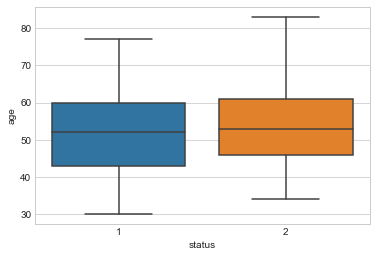

In [40]:
sns.boxplot(x='status',y='age', data=haberman)
plt.show()

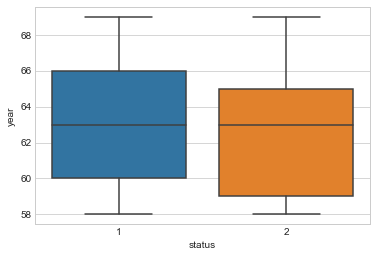

In [42]:
sns.boxplot(x='status',y='year', data=haberman)
plt.show()

# Violin plots

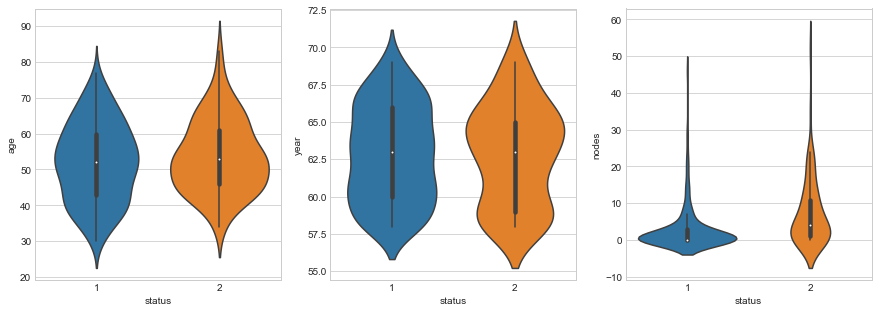

In [31]:
#Violin plot is the combination of box plot and probability density function.
#Denser regions of the data are fatter, and sparser ones thinner in a violin plot.

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(haberman.columns)[:-1]):
    sns.violinplot( x='status', y=feature, data=haberman, ax=axes[idx])
plt.show()

Observation:

-> The number of positive lymph nodes of the survivors is highly densed from 0 to 5.

-> Almost 80% of the patients have less than or equal to 5 positive lymph survived more than 5 years.

-> From box plots and violin plots, we can say that more no of patients who are dead have age between 46-62,year between 59-65      and the patients who survived have age between 42-60, year between 60-66.

# Contour plot

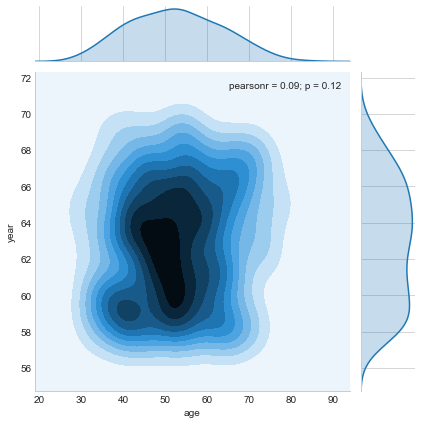

In [32]:
sns.jointplot(x="age", y="year", data=haberman, kind="kde");
plt.show()

Observation: There are more number of people who have undergone operation during the year 1959 - 1964 period and between the ages 42 - 60.

# Conclusions:

1) There are 306 observations with 4 features in the data set.

2)It is an imbalanced dataset with-

           a. 225 patients belonging to status 1, those who survived for 5 years and longer and
           b. 81 patients belonging to status 2, those who survived for less than 5 years.
           
3) Using scatter plot(Bi-variate analysis) -

           a. Most of the people have zero positive_lymph_nodes.
           b. We cannot distinguish between the people who survived and who didn't survive.
4) Using Pair-plot concept(Bi-variate analysis)-

           a. positive_lymph_nodes VERSUS Age is the useful plot to atleast get the insight that most people who survived have 0 postive lymph nodes detected.
           b. Age and Operation_Year have overlapping curves which makes difficult for classifying the survival status.
           c. but we cannot distinguish the data easily with the help of these plots as most of them are overlapping.                          
5) Using PDFs(Uni-variate Analysis)-

           a.  both Age and Operation_Year are not good features for useful insights as the distibution is more similar for both people who survived and also dead.
           b. positive_lymph_nodes is the only feature that is useful to know about the survival status of patients as there is difference between the distributions for both classes(labels). From that distibution we can infer that most survival patients have fallen in to zero positive_lymph_nodes.
           c. More number of people are not survived in year of operation of 1965.
           
6) Using CDFs(Uni-variate analysis)-

           a. We can observe that almost for all the features the statistics are similar except for positive_lymph_nodes.
           b. We can infer that patients above 46 axillary nodes detected can be considered as dead within 5 years. So,People having less number of positive_lymph_node have survived over 5 years.
           
7) The mean(average) of positive_lymph_nodes is more for people who died within 5 years than people who have survived for more than 5 years.

8) Mean age of patients who survived is 52 years and who didn't survive is 54 years.

9) Using Box plot and Violin plots-

           a. The number of positive lymph nodes of the survivors is highly densed from 0 to 5.
           b. Almost 80% of the patients have less than or equal to 5 positive lymph survived more than 5 years.
           c. From box plots and violin plots, we can say that more no of patients who are dead have age between 46-62,year between 59-65 and the patients who survived have age between 42-60, year between 60-66. 
           
10) Using Contour plot-

           a. There are more number of people who have undergone operation during the year 1959 - 1964 period and between the ages 42 - 60.